In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

import warnings
# 1. 忽略所有警告
warnings.filterwarnings("ignore")

In [2]:
# 加载数据集
file_path = 'training_set.csv'
df = pd.read_csv(file_path)

print(df.shape)
df.describe(include='all')

(40068, 29)


,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,40068.000000,40068.000000,40068.000000,40068.000000,40068,40068.000000,4.006800e+04,40068,40068.000000,40068.000000,...,40068,40068.000000,40068.000000,40068.000000,40068,40068.000000,40068.000000,40068,40068.000000,40068
unique,NaN,NaN,NaN,NaN,9981,NaN,NaN,15,NaN,NaN,...,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,NaN,Jonathan Stempelr,NaN,NaN,Engineer,NaN,NaN,...,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,NaN,22,NaN,NaN,2791,NaN,NaN,...,18323,NaN,NaN,NaN,20959,NaN,NaN,11294,NaN,21369
mean,49786.860487,80312.534541,25962.914096,4.512379,NaN,33.383548,4.999424e+08,NaN,50548.770843,4201.463122,...,NaN,1430.430861,32.296743,221.462688,NaN,107.113297,55.166782,NaN,394.773343,NaN
std,28848.334648,43272.497651,14333.055913,2.289943,NaN,10.770278,2.902124e+08,NaN,38576.142150,3209.714494,...,NaN,1156.000794,5.106629,99.994102,NaN,132.267683,39.333846,NaN,203.008579,NaN
min,1.000000,5635.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,...,NaN,0.230000,20.000000,2.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,24809.250000,42846.250000,13698.000000,3.000000,NaN,25.000000,2.467551e+08,NaN,19268.042500,1620.572500,...,NaN,571.100000,28.061790,144.000000,NaN,28.847965,27.975483,NaN,268.382537,NaN
50%,49698.500000,80180.500000,25717.500000,5.000000,NaN,33.000000,4.988856e+08,NaN,36821.000000,3079.935416,...,NaN,1171.750000,32.313189,220.000000,NaN,66.158421,45.055087,NaN,334.306003,NaN
75%,74708.750000,117694.750000,38382.000000,7.000000,NaN,42.000000,7.556115e+08,NaN,71843.520000,5989.858750,...,NaN,1952.970000,36.504148,302.000000,NaN,146.268887,71.200543,NaN,465.960038,NaN


In [3]:
# 前两列ID无用，删了
df = df.iloc[:, 2:]

In [4]:
#空缺值查看
print('Null Values of the Dataset :')
df.isna().sum().to_frame()

Null Values of the Dataset :


,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0


In [5]:
# 重复值查看
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 40068 entries in anime dataset.


In [6]:
objects = ['Name','Occupation', 'Type_of_Loan', 
           'Credit_Mix', 'Payment_of_Min_Amount', 
           'Payment_Behaviour', 'Credit_Score']

from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for col in df.columns:
    if col in objects:
        df[col]=lc.fit_transform(df[col])
        
# 选择属性和标签
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

,feature,VIF
0,Annual_Income,879.0
1,Monthly_Inhand_Salary,855.0
2,Credit_Utilization_Ratio,31.0
3,Num_Credit_Card,12.0
4,Monthly_Balance,11.0
5,Credit_History_Age,11.0
6,Num_Bank_Accounts,11.0
7,Num_of_Delayed_Payment,11.0
8,Age,10.0
9,Amount_invested_monthly,9.0


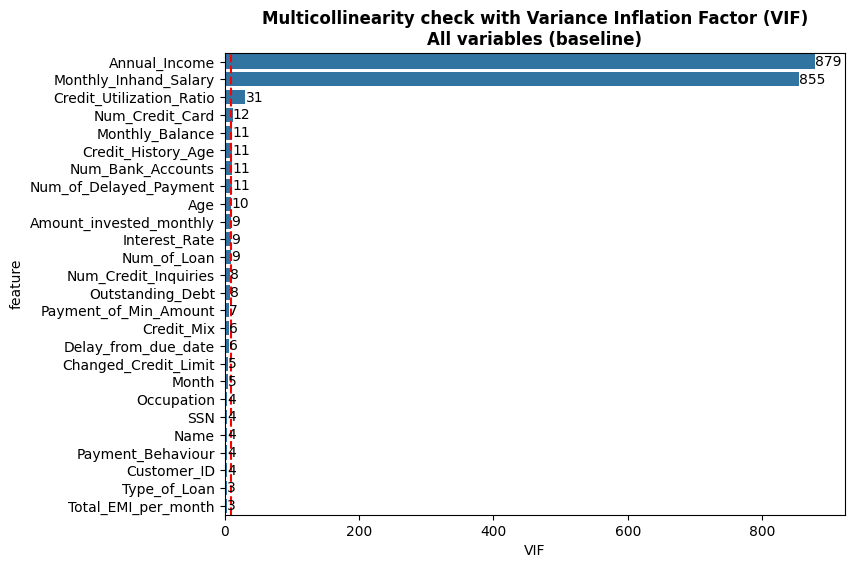

In [7]:
def calculate_vif(df, var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [
        variance_inflation_factor(df.values, i).round(0) for i in range(len(df.columns))
    ]
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    display(vif_data)
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=vif_data, x="VIF", y="feature")
    for i in ax.containers:
        ax.bar_label(
            i,
        )
        ax.axvline(x=10, linestyle="dashed", color="red")
    plt.title(
        f"Multicollinearity check with Variance Inflation Factor (VIF)\n{var}",
        fontweight="bold",
    )
    plt.show()
    return vif_data


X1 = calculate_vif(X, "All variables (baseline)")

In [8]:
# 删掉vif太高的属性
X1 = X.drop(columns=["Annual_Income",'Monthly_Inhand_Salary', 'Credit_Utilization_Ratio'], axis=1)

In [9]:
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

# 构建 XGBoost 分类器
model = xgb.XGBClassifier(objective="multi:softmax",
						  num_class=3, 
						  eval_metric="mlogloss", 
						  use_label_encoder=False)

# 训练模型
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [10]:
# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率：{accuracy:.4f}")

# 打印分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

准确率：0.7692
分类报告：
              precision    recall  f1-score   support

           0       0.71      0.70      0.70      2139
           1       0.77      0.75      0.76      3496
           2       0.79      0.80      0.80      6386

    accuracy                           0.77     12021
   macro avg       0.76      0.75      0.75     12021
weighted avg       0.77      0.77      0.77     12021



In [11]:
importance = pd.Series(data=model.feature_importances_, index=X1.columns)
importance

Customer_ID                0.013208
Month                      0.026461
Name                       0.013204
Age                        0.012845
SSN                        0.014168
Occupation                 0.012775
Num_Bank_Accounts          0.017171
Num_Credit_Card            0.032279
Interest_Rate              0.088545
Num_of_Loan                0.013648
Type_of_Loan               0.013791
Delay_from_due_date        0.023317
Num_of_Delayed_Payment     0.015943
Changed_Credit_Limit       0.020982
Num_Credit_Inquiries       0.014416
Credit_Mix                 0.505691
Outstanding_Debt           0.082986
Credit_History_Age         0.012926
Payment_of_Min_Amount      0.011281
Total_EMI_per_month        0.016309
Amount_invested_monthly    0.015398
Payment_Behaviour          0.012193
Monthly_Balance            0.010463
dtype: float32

In [12]:
df = pd.read_csv('test_set.csv')
for cl in df.columns:
	if cl not in X1.columns:
		df = df.drop(columns=cl, axis=1)
	elif cl in objects:
		df[cl]=lc.fit_transform(df[cl])

y_pred = pd.DataFrame(model.predict(df), columns=['Label'])

trans = {0:'Good', 1:'Poor', 2:'Standard'}

for i in range(len(y_pred)):
	y_pred.iloc[i] = trans[y_pred.iloc[i, 0]]

y_pred.to_csv('result.csv', index=False)
